In [1]:
import numpy as np 
import pandas as pd

import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.style.use('ggplot')                     # background grid aesthetics

import mysql.connector as mariadb
from dotenv import load_dotenv              # environment variables
import os

In [2]:
# load the environment variables
load_dotenv()

# assign environment variables
PASSWORD = os.getenv('MariaDB_Password')

Functions
- retrieve data from Customer Table
- retrieve data from Branch Table
- retrieve data from Credit Table

In [3]:
def get_customer_data():
    try:
        # establish connection to MariaDB
        con = mariadb.connect(
            host='localhost',
            user='root',
            password=PASSWORD,
            database='creditcard_capstone'
        )
        print('Connected to MariaDB database...')

        # create a cursor
        cur = con.cursor()
        # SQL statement
        query = ''' 
        SELECT *
        FROM cdw_sapp_customer
        '''
        # execute SQL statement
        cur.execute(query)

        # convert results to pandas dataframe
        customer_df = pd.DataFrame(cur, columns=['SSN', 
                                                 'FIRST_NAME', 
                                                 'MIDDLE_NAME', 
                                                 'LAST_NAME', 
                                                 'CREDIT_CARD_NO', 
                                                 'FULL_STREET_ADDRESS', 
                                                 'CUST_CITY', 
                                                 'CUST_STATE', 
                                                 'CUST_COUNTRY', 
                                                 'CUST_ZIP', 
                                                 'CUST_PHONE', 
                                                 'CUST_EMAIL', 
                                                 'LAST_UPDATED'])
        # close connection to MariaDB
        con.close()
        print('Connection closed...')

        return customer_df
    except mariadb.ERROR as err:
        print(err)

In [11]:
def get_branch_data():
    try:
        # establish connection to MariaDB
        con = mariadb.connect(
            host='localhost',
            user='root',
            password=PASSWORD,
            database='creditcard_capstone'
        )
        print('Connected to MariaDB database...')

        # create a cursor
        cur = con.cursor()
        # SQL statement
        query = ''' 
        SELECT *
        FROM cdw_sapp_branch
        '''
        # execute SQL statement
        cur.execute(query)

        # convert results to pandas dataframe
        branch_df = pd.DataFrame(cur, columns=['BRANCH_CODE', 
                                               'BRANCH_NAME', 
                                               'BRANCH_STREET', 
                                               'BRANCH_CITY',
                                               'BRANCH_STATE', 
                                               'BRANCH_ZIP', 
                                               'BRANCH_PHONE', 
                                               'LAST_UPDATED'])
        # close connection to MariaDB
        con.close()
        print('Connection closed...')

        return branch_df
    except mariadb.ERROR as err:
        print(err)

In [4]:
def get_credit_data():
    try:
        # establish connection to MariaDB
        con = mariadb.connect(
            host='localhost',
            user='root',
            password=PASSWORD,
            database='creditcard_capstone'
        )
        print('Connected to MariaDB database...')

        # create a cursor
        cur = con.cursor()
        # SQL statement
        query = ''' 
        SELECT *
        FROM cdw_sapp_credit_card
        '''
        # execute SQL statement
        cur.execute(query)

        # convert results to pandas dataframe
        credit_df = pd.DataFrame(cur, columns=['CUST_CC_NO', 
                                               'TIMEID', 
                                               'CUST_SSN', 
                                               'BRANCH_CODE',
                                               'TRANSACTION_TYPE', 
                                               'TRANSACTION_VALUE', 
                                               'TRANSACTION_ID'])
        # close connection to MariaDB
        con.close()
        print('Connection closed...')

        return credit_df
    except mariadb.ERROR as err:
        print(err)

Pandas Dataframes
- customer_df
- branch_df
- credit_df

In [5]:
customer_df = get_customer_data()
customer_df.head()

Connected to MariaDB database...
Connection closed...


,SSN,FIRST_NAME,MIDDLE_NAME,LAST_NAME,CREDIT_CARD_NO,FULL_STREET_ADDRESS,CUST_CITY,CUST_STATE,CUST_COUNTRY,CUST_ZIP,CUST_PHONE,CUST_EMAIL,LAST_UPDATED
0,123456100,Alec,wm,Hooper,4210653310061055,"Main Street North, 656",Natchez,MS,United States,39120,(781)123-3781,AHooper@example.com,2018-04-21 12:49:02
1,123453023,Etta,brendan,Holman,4210653310102868,"Redwood Drive, 829",Wethersfield,CT,United States,6109,(781)123-3893,EHolman@example.com,2018-04-21 12:49:02
2,123454487,Wilber,ezequiel,Dunham,4210653310116272,"12th Street East, 683",Huntley,IL,United States,60142,(781)124-4301,WDunham@example.com,2018-04-21 12:49:02
3,123459758,Eugenio,trina,Hardy,4210653310195948,"Country Club Road, 253",NewBerlin,WI,United States,53151,(781)124-4321,EHardy@example.com,2018-04-21 12:49:02
4,123454431,Wilfred,may,Ayers,4210653310356919,"Madison Street, 301",ElPaso,TX,United States,79930,(781)124-4207,WAyers@example.com,2018-04-21 12:49:02


In [13]:
branch_df = get_branch_data()
branch_df.head()

Connected to MariaDB database...
Connection closed...


,BRANCH_CODE,BRANCH_NAME,BRANCH_STREET,BRANCH_CITY,BRANCH_STATE,BRANCH_ZIP,BRANCH_PHONE,LAST_UPDATED
0,1,Example Bank,Bridle Court,Lakeville,MN,55044,(781)123-3456,2018-04-18 16:51:47
1,2,Example Bank,Washington Street,Huntley,IL,60142,(781)123-3461,2018-04-18 16:51:47
2,3,Example Bank,Warren Street,SouthRichmondHill,NY,11419,(781)123-3498,2018-04-18 16:51:47
3,4,Example Bank,Cleveland Street,Middleburg,FL,32068,(781)123-3466,2018-04-18 16:51:47
4,5,Example Bank,14th Street,KingOfPrussia,PA,19406,(781)123-3484,2018-04-18 16:51:47


In [6]:
credit_df = get_credit_data()
credit_df.head()

Connected to MariaDB database...
Connection closed...


,CUST_CC_NO,TIMEID,CUST_SSN,BRANCH_CODE,TRANSACTION_TYPE,TRANSACTION_VALUE,TRANSACTION_ID
0,4210653342242023,20180315,123451310,180,Bills,77.79,45069
1,4210653349028689,20180214,123459988,114,Education,78.90,1
2,4210653342242023,20180419,123451310,107,Healthcare,20.47,45070
3,4210653312478046,20180813,123455692,156,Grocery,91.08,22562
4,4210653349028689,20180320,123459988,35,Entertainment,14.24,2


Data Visualizations
- horizontal bar chart
- vertical bar chart + line chart
- histogram
- stacked horizontal bar chart

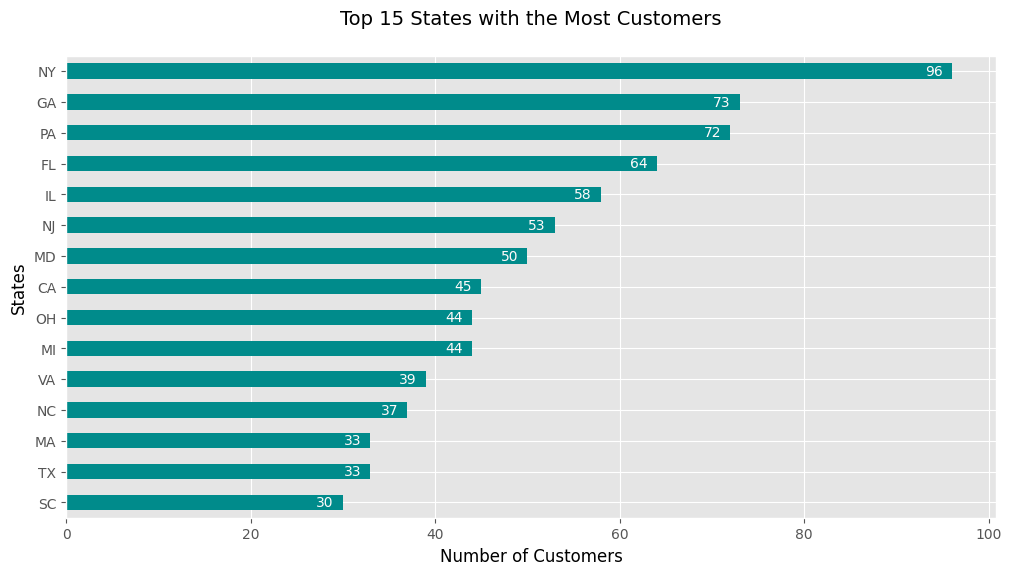

In [122]:
# Find and plot which state has a high number of customers.

# count the number of customers per state
num_cust_by_state = customer_df.value_counts('CUST_STATE')
# filter for the top 15 states
top_15_states = num_cust_by_state[:15]
# sort values so horizontal bar chart will display in descending order
top_15_states.sort_values(ascending=True, inplace=True)
#---------------------------------------------------------------------
# horizontal bar chart
top_15_states.plot(kind='barh', color='darkcyan', figsize=(12, 6))

plt.title('Top 15 States with the Most Customers', fontsize=14, y=1.05)         # move the title up
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('States', fontsize=12)

# annotate text
for state, num_cust in enumerate(top_15_states.values):
    plt.annotate(num_cust, xy=(num_cust - 1, state), va='center', ha='right', color='snow')

plt.show()

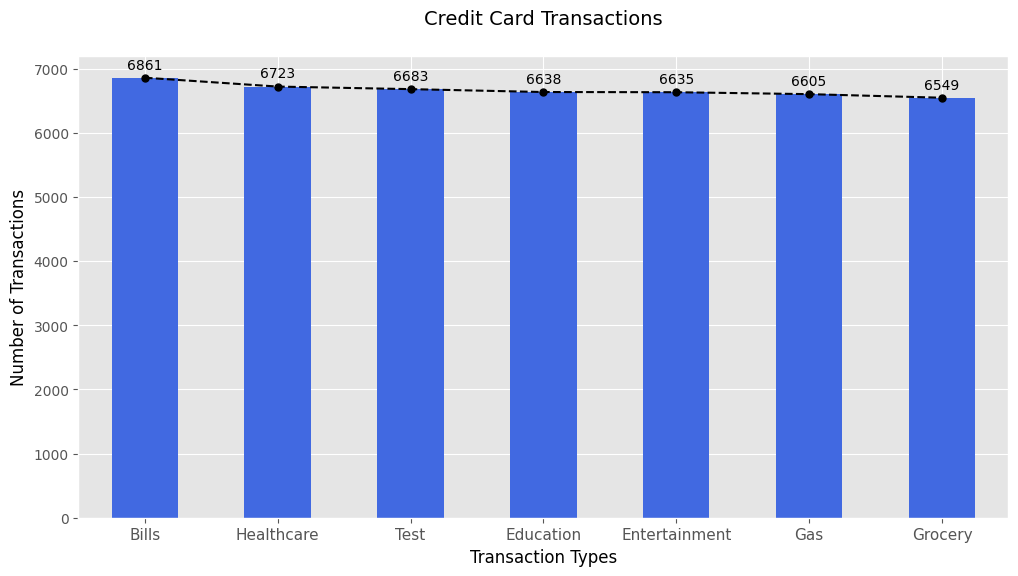

In [168]:
# Find and plot which transaction type has a high rate of transactions.

# num the number of transaction per transaction_type
transaction_type_df = credit_df.value_counts('TRANSACTION_TYPE')
#---------------------------------------------------------------------
# vertical bar chart + line chart
transaction_type_df.plot(kind='bar', color='royalblue', figsize=(12, 6))
transaction_type_df.plot(kind='line', color='black', linestyle='dashed', marker='o', markersize=5)

plt.title('Credit Card Transactions', fontsize=14, y=1.05)                      # move the title up
plt.xlabel('Transaction Types', fontsize=12)
plt.xticks(fontsize=11, rotation=0)                                             # categories were sideways, rotate to vertical position
plt.ylabel('Number of Transactions', fontsize=12)

# annotate text
for type, num in enumerate(transaction_type_df.values):
    plt.annotate(num, xy=(type, num + 200), va='center', ha='center')

plt.show()

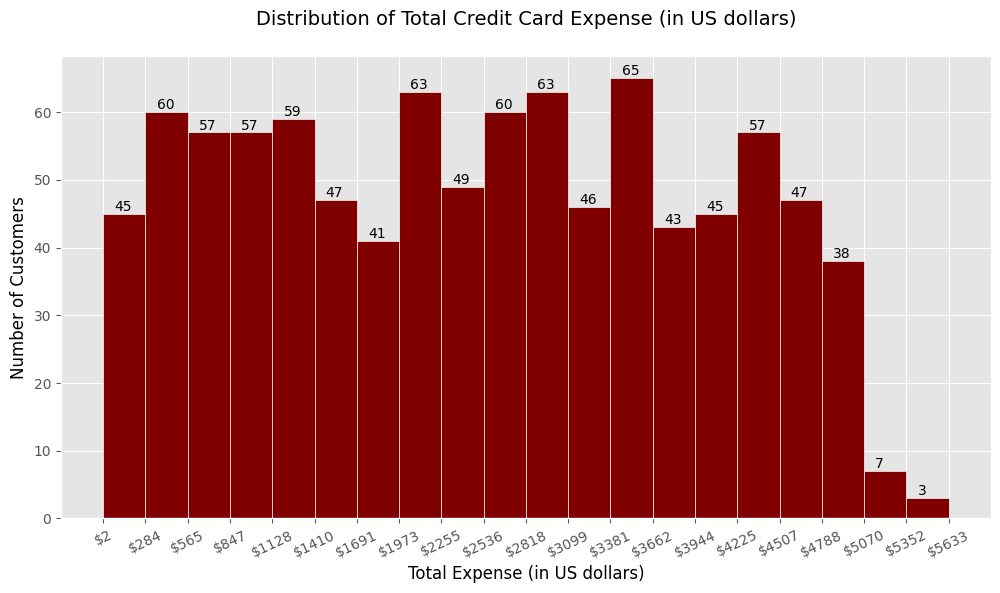

In [7]:
# (PART 1)
# Find and plot the sum of all transactions for each customer. 

# select columns CUST_SSN + TRANSACTION_VALUE 
filtered_credit_df = credit_df[['CUST_SSN', 'TRANSACTION_VALUE']]
# group by each customer and get sum of all their transactions
sum_credit_df = filtered_credit_df.groupby('CUST_SSN').sum()
# sort by descending order
sum_credit_df = sum_credit_df.sort_values('TRANSACTION_VALUE', ascending=False)
#---------------------------------------------------------------------
# histogram
count, bin_edges = np.histogram(sum_credit_df, 20)
# print(count)                                                                                      # number of customers who fall in each bin 
# print(bin_edges)                                                                                  # range(in US-dollars) for each bin
label_bin_edges = list(map(lambda x: f'${x:.0f}', bin_edges))                                       # format with dollar sign

sum_credit_df.plot(kind='hist', 
                   bins=len(count), 
                   color='maroon',
                   edgecolor='whitesmoke',                                                          # give each bar an edge color
                   legend=None, 
                   figsize=(12, 6))

plt.title('Distribution of Total Credit Card Expense (in US dollars)', fontsize=14, y=1.05)         # move the title up
plt.xlabel('Total Expense (in US dollars)', fontsize=12)
plt.xticks(ticks=bin_edges, labels=label_bin_edges, rotation=25)                                    # ticks-numeric / labels-string
plt.ylabel('Number of Customers', fontsize=12)

# annotate text
zipped = list(zip(count, bin_edges))                                                                # combine count + bin_edges
for count, bin_edge in zipped:
    plt.annotate(count, xy=(bin_edge + 75, count), va='bottom')

plt.show()

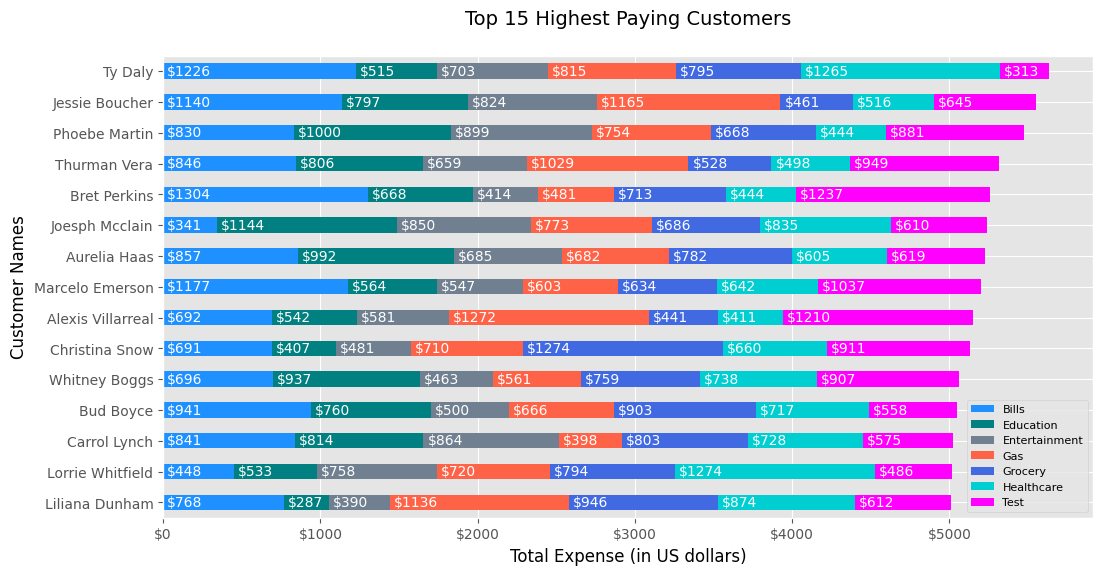

In [258]:
# (PART 2)
# And which customer has the highest transaction amount.

# ----------------------------------------------------------------------------------------------------
# should NOT display customer SSN on charts/graphs
# will need to convert their SSN -> their names
# by merging credit_df + customer_df
# ----------------------------------------------------------------------------------------------------

# reset index so that CUST_SSN can become the column to use for dataframe merge
new_credit_df = sum_credit_df.reset_index()

# rename column SSN -> CUST_SSN so that it will match the column in new_credit_df
filtered_customer_df = customer_df[['SSN', 'FIRST_NAME', 'LAST_NAME']]
filtered_customer_df = filtered_customer_df.rename(columns={'SSN':'CUST_SSN'})
# create new column FULL_NAME and drop old columns
filtered_customer_df['FULL_NAME'] = filtered_customer_df['FIRST_NAME'] + ' ' + filtered_customer_df['LAST_NAME']
filtered_customer_df.drop(columns=['FIRST_NAME', 'LAST_NAME'], inplace=True)

# merge the two dataframes
merged_df = pd.merge(new_credit_df, filtered_customer_df, on='CUST_SSN')
merged_df = merged_df.set_index('FULL_NAME')

# select only the top 15 paying customers 
top_15_customers_df = merged_df[:15]
# sort values so horizontal bar chart will display in descending order
top_15_customers_df = top_15_customers_df.sort_values('TRANSACTION_VALUE', ascending=True)

# ----------------------------------------------------------------------------------------------------

# iterate through all 15 people and find the total amount spent per transaction type
# for example: this is a breakdown of Liliana Dunham's expenses
       # Bills	       768.15
       # Education	       286.67
       # Entertainment	389.80
       # Gas	              1135.88
       # Grocery	       946.09
       # Healthcare	       874.32
       # Test	              611.90
customers_expenses = []
for i, ssn in enumerate(top_15_customers_df['CUST_SSN']):
    # search for person by their ssn + get a breakdown of their expenses by category
    person_df = credit_df[credit_df['CUST_SSN'] == ssn]
    person_df = person_df[['TRANSACTION_TYPE', 'TRANSACTION_VALUE']]
    person_df = person_df.groupby('TRANSACTION_TYPE').sum()
    
    # append the customer's name + all their expenses by category
    customers_expenses.append([top_15_customers_df.iloc[i].name, *person_df.values.flatten()])
    # create column names for dataframe
    columns = ['Full_Name'] + person_df.index.to_list()

# create a new dataframe with all the segmented expense categories 
expense_categories_df = pd.DataFrame(customers_expenses, columns=columns)

# ----------------------------------------------------------------------------------------------------

# stacked horizontal bar chart - https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
xticks = np.arange(0, 6000, 1000)
xlabel = list(map(lambda x: f'${x:.0f}', np.arange(0, 6000, 1000)))                                # format with dollar sign

expense_categories_df.plot(kind='barh', 
       x='Full_Name', 
       color=['dodgerblue', 
              'teal', 
              'slategray', 
              'tomato', 
              'royalblue', 
              'darkturquoise', 
              'magenta'], 
       stacked=True,
       figsize=(12, 6))

plt.title('Top 15 Highest Paying Customers', fontsize=14, y=1.05)                                   # move the title up
plt.xlabel('Total Expense (in US dollars)', fontsize=12)
plt.xticks(ticks=xticks, labels=xlabel)                                                             # ticks-numeric / labels-string
plt.ylabel('Customer Names', fontsize=12)
plt.legend(loc='lower right', fontsize=8)

# annotate text
for customer, row in enumerate(customers_expenses):
    category_values = row[1:]
    # need to keep track of the x-axis distance
    x_distance = 0                                                                
    for val in category_values:
        plt.annotate(f'${val:.0f}', xy=(x_distance + 25, customer), va='center', ha='left', color='white')
       # need to increment the x-axis distance value, otherwise all the values will clump up on one spot
        x_distance += val

plt.show()